In [1]:
import import_ipynb
from nexoheader import *
import uproot3


import sys

importing Jupyter notebook from nexoheader.ipynb


In [3]:
def BlankNexoDF_Sens():
    
    return pd.DataFrame(columns= ['energy', 'energy_mctruth_allLXe', 'energy_mctruth_inTPC',
       'r_max_simple', 'lower_z', 'upper_z', 'standoff', 'standoff_r',
       'standoff_z', 'passed_z_thresh', 'passed_xy_thresh', 'r_max_3d',
       'n_x_ch_abovenoise', 'n_y_ch_abovenoise', 'max_r_mctruth',
       'lower_z_mctruth', 'upper_z_mctruth', 'standoff_mctruth',
       'standoff_r_mctruth', 'standoff_z_mctruth', 'max_r_active_mctruth',
       'lower_z_active_mctruth', 'upper_z_active_mctruth',
       'standoff_active_mctruth', 'standoff_r_active_mctruth',
       'standoff_z_active_mctruth', 'm_nQ', 'm_nOPCal', 'm_nOPCollected',
       'm_DNNvalue', 'NESTBugFound', 'ratio', 'fGenX', 'fGenY', 'fGenZ',
       'Branch_ratio', 'Seed', 'Nevts'])

In [4]:
def TotalSimCount(DF):

    try:
        return float(DF[["Seed","Nevts"]].groupby("Seed").mean().sum())
        
    except:
        print(-1)
        
def Gauss(x, A, B,C):
    y = A*np.exp( (-1*(x-B)**2)/2*C**2)
    return y

In [5]:
def GetNexoDF(tgt,version="-v3"):
    sensfile="/home/wrkshp/nexo/slurm_data/sens/%s%s-sens_1-200.root"%(tgt,version)



    File=uproot.open(sensfile)
    keys=File.keys()

    F_keys=File[keys[0]]
    F_dict={}
    for i,j in enumerate(F_keys.keys()):
        F_dict[j]=F_keys[j].array()

    DF=pd.DataFrame.from_dict(F_dict)    
    return DF

In [6]:
def GetNexosingleroot(DF):
    
    info=DF.iloc[0]
    
    sensfile="/home/wrkshp/nexo/slurm_data/sens/%s-%s-seed%s.root"%(info["Target"],info["Version"],info["Seed"])
    
        
    

    File=uproot.open(sensfile)
    keys=File.keys()

    F_keys=File[keys[0]]
    F_dict={}
    for i,j in enumerate(F_keys.keys()):
        F_dict[j]=F_keys[j].array()

    DF=pd.DataFrame.from_dict(F_dict)    
    DF["Target"]=info["Target"]
    return DF

In [6]:

standoff=100

sscuts_array=["standoff>%i and m_DNNvalue > 0.850 "%(standoff),
    " and n_x_ch_abovenoise > 0 and n_y_ch_abovenoise > 0",
    " and passed_xy_thresh == 1 and passed_z_thresh== 1 " ,
    " and (m_nOPCal <1.077*m_nQ+313) ",
    " and (m_nOPCal >0.597*m_nQ-216) "]


#cuts_array=["standoff>-200 and  standoff<200"]


sscuts= "".join(sscuts_array)


TL_peak_cut_array = sscuts_array + ["and abs(energy - 2614) < 10"]
TL_peakcuts= "".join(TL_peak_cut_array)


Co_peak_cut_array = sscuts_array + ["and abs(energy - 1332.5) < 10"]
Co_peakcuts= "".join(Co_peak_cut_array)

Cs_peak_cut_array = sscuts_array + ["and abs(energy - 661.657) < 10"]
Cs_peakcuts= "".join(Cs_peak_cut_array)



In [7]:
NDB=NexoDB()

In [196]:
AA=NDB.iloc[0]


In [197]:
NDB.query("Target == 'Tl208' and Version == 'v4' and TfileError == 0")

,Config,Target,NumEvents,Seed,Version,RootCheck,Sens_Check,TfileError,G4Exc,G4Complete
1400,ExternalGammas_light,Tl208,5000,1,v4,False,1,0,6371,True
1401,ExternalGammas_light,Tl208,5000,10,v4,False,1,0,6390,True
1402,ExternalGammas_light,Tl208,5000,11,v4,False,1,0,6402,True
1403,ExternalGammas_light,Tl208,5000,12,v4,False,1,0,6405,True
1404,ExternalGammas_light,Tl208,5000,13,v4,False,1,0,6456,True
1405,ExternalGammas_light,Tl208,5000,14,v4,False,1,0,6344,True
1406,ExternalGammas_light,Tl208,5000,15,v4,False,1,0,6252,True
1407,ExternalGammas_light,Tl208,5000,16,v4,False,1,0,6319,True
1408,ExternalGammas_light,Tl208,5000,17,v4,False,1,0,6190,True
1409,ExternalGammas_light,Tl208,5000,18,v4,False,1,0,6331,True


0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 1
10 2
11 3
12 4
13 5
14 6
15 7
16 8
17 9
18 1
19 2
20 3
21 4
22 5
23 6
24 7
25 8
26 9
27 1
28 2
29 3
30 4
31 5
32 6
33 7
34 8
35 9
36 1
37 2
38 3
39 4
40 5
41 6
42 7
43 8
44 9
45 1
46 2
47 3
48 4
49 5
50 6
51 7
52 9
53 8
54 1
55 2
56 3
57 4
58 5
59 6
60 7
61 8
62 9
63 99
64 10
65 11
66 12
67 13
68 14
69 15
70 16
71 17
72 18
73 19
74 20
75 21
76 22
77 23
78 24
79 25
80 26
81 27
82 28
83 29
84 30
85 31
86 32
87 33
88 34
89 35
90 36
91 37
92 38
93 39
94 40
95 41
96 42
97 43
98 44
99 45
100 46
101 47
102 48
103 49
104 50
105 51
106 52
107 53
108 54
109 55
110 56
111 57
112 58
113 59
114 60
115 61
116 62
117 63
118 64
119 65
120 66
121 67
122 68
123 69
124 70
125 71
126 72
127 73
128 74
129 75
130 76
131 77
132 78
133 79
134 80
135 81
136 82
137 83
138 84
139 85
140 86
141 87
142 88
143 89
144 90
145 91
146 92
147 93
148 94
149 95
150 96
151 97
152 98
153 99
154 10
155 11
156 12
157 13
158 14
159 15
160 16
161 17
162 18
163 19
164 20
165 21
166 22
167 

In [8]:
class SourceSim:
    def __init__(self, target,version="v3"):
        self.Target=target
        self.Version=version
        
        
    def ReadDB(self,DB=""):
        
        if type(DB) != type(pd.DataFrame):
            DB=NexoDB()
            
        
        self.TotalSim = DB.query("Target == '%s' and Version == '%s'"%(self.Target, self.Version))["NumEvents"].sum()
        self.SeedCount= len(np.array(DB.query("Target == '%s' and Version == '%s'"%(self.Target, self.Version))["Seed"]))
        self.MissingSeedCount =len(DB.query("Target == '%s' and Version == '%s' and TfileError == 'G4 does not exsits'"%(self.Target, self.Version)))
        self.DB =DB.query("Target == '%s' and Version == '%s'"%(self.Target, self.Version))
        self.SeedList=DB.query("Target == '%s' and Version == '%s' and RootCheck == True"%(self.Target, self.Version))["Seed"]
    def LoadRoot(self):
        
        DFs=[]
        for i,j in enumerate(self.SeedList):
            
            
            DFs.append(GetNexosingleroot(self.DB.query("Seed == '%s'"%(j))))
            #print(j, type(GetNexosingleroot(self.DB.query("Seed == '%s'"%(j)))))
            

        if len(DFs) > 1:
            DF=pd.concat(DFs)
        else:
            DF=BlankNexoDF_Sens()
            
            
        
        return DF
            
            
            
            
            
    

In [199]:
Sim_Th228=SourceSim("Tl208")

In [12]:
Tl208v4 = SourceSim("Tl208","v4")
Tl208v4.ReadDB()
Tl208v4.SeedList , Tl208v4.SeedCount


(1400     1
 1401    10
 1402    11
 1403    12
 1404    13
 1405    14
 1406    15
 1407    16
 1408    17
 1409    18
 1410    19
 1411     2
 1412    20
 1413     3
 1414     4
 1415     5
 1416     6
 1417     7
 1418     8
 1419     9
 Name: Seed, dtype: object,
 20)

In [13]:
Tl208v4.DB

,Config,Target,NumEvents,Seed,Version,RootCheck,Sens_Check,TfileError,G4Exc,G4Complete
1400,ExternalGammas_light,Tl208,5000,1,v4,True,1,0,6371,True
1401,ExternalGammas_light,Tl208,5000,10,v4,True,1,0,6390,True
1402,ExternalGammas_light,Tl208,5000,11,v4,True,1,0,6402,True
1403,ExternalGammas_light,Tl208,5000,12,v4,True,1,0,6405,True
1404,ExternalGammas_light,Tl208,5000,13,v4,True,1,0,6456,True
1405,ExternalGammas_light,Tl208,5000,14,v4,True,1,0,6344,True
1406,ExternalGammas_light,Tl208,5000,15,v4,True,1,0,6252,True
1407,ExternalGammas_light,Tl208,5000,16,v4,True,1,0,6319,True
1408,ExternalGammas_light,Tl208,5000,17,v4,True,1,0,6190,True
1409,ExternalGammas_light,Tl208,5000,18,v4,True,1,0,6331,True


In [14]:

Sim_Th228.ReadDB()
Sim_Th228.SeedCount, Sim_Th228.TotalSim, Sim_Th228.MissingSeedCount
Th228_RF=Sim_Th228.LoadRoot()
Th228_RF

NameError: name 'Sim_Th228' is not defined

In [29]:
Sim_Th228.SeedList

0      1
0      2
0      3
0      4
0      5
    ... 
0    196
0    197
0    198
0    199
0    200
Name: Seed, Length: 200, dtype: object

In [19]:
chain=["Th228","Ra224","Pb212","Bi212","Tl208"]
version="v3"
if 1==1:
#def Get DecayChain(chain,version="v3"):

    Chainsources=[]
    Chainsource_list=[]
    for tgt in chain:
        Source = SourceSim(tgt,version)
        Source.ReadDB()
        SourceDF=Source.LoadRoot()
        print(len(SourceDF["energy"]))
        Chainsources.append(SourceDF)
        Chainsource_list.append(Source)
    ChainDF=pd.concat(Chainsources)
        
        





0
27
238
7352
192258


In [205]:
Tl208v4.Version

'v4'

In [192]:
ChainDF.to_pickle("Th288Chain_1M.pkl")

In [162]:
ChainDF.keys()

Index(['energy', 'energy_mctruth_allLXe', 'energy_mctruth_inTPC',
       'r_max_simple', 'lower_z', 'upper_z', 'standoff', 'standoff_r',
       'standoff_z', 'passed_z_thresh', 'passed_xy_thresh', 'r_max_3d',
       'n_x_ch_abovenoise', 'n_y_ch_abovenoise', 'max_r_mctruth',
       'lower_z_mctruth', 'upper_z_mctruth', 'standoff_mctruth',
       'standoff_r_mctruth', 'standoff_z_mctruth', 'max_r_active_mctruth',
       'lower_z_active_mctruth', 'upper_z_active_mctruth',
       'standoff_active_mctruth', 'standoff_r_active_mctruth',
       'standoff_z_active_mctruth', 'm_nQ', 'm_nOPCal', 'm_nOPCollected',
       'm_DNNvalue', 'NESTBugFound', 'ratio', 'fGenX', 'fGenY', 'fGenZ',
       'Branch_ratio', 'Seed', 'Nevts', 'Target'],
      dtype='object')

In [163]:
len(ChainDF["energy"]),ChainDF["Branch_ratio"].sum(),len(ChainDF.query("Target == 'Tl208'"))

(199875, 76714.52520000002, 192258)

Target : Ra224 , Deposited Events : 27 , 	 Weight with BR: 27.0 ,  	 Total Sim:  1000000
Alpha  2.7e-05
		GEvents : 0.0 , Gamma  0.0 GEvents nobr  0  Gammanbr  0.0
Target : Pb212 , Deposited Events : 238 , 	 Weight with BR: 238.0 ,  	 Total Sim:  1000000
Alpha  0.000238
		GEvents : 0.0 , Gamma  0.0 GEvents nobr  0  Gammanbr  0.0
Target : Bi212 , Deposited Events : 7352 , 	 Weight with BR: 7352.0 ,  	 Total Sim:  1000000
Alpha  0.007352
		GEvents : 1.0 , Gamma  1e-06 GEvents nobr  1  Gammanbr  1e-06
Target : Tl208 , Deposited Events : 192258 , 	 Weight with BR: 69097.5 ,  	 Total Sim:  1000000
Alpha  0.192258
		GEvents : 32.346 , Gamma  3.2346e-05 GEvents nobr  90  Gammanbr  9e-05


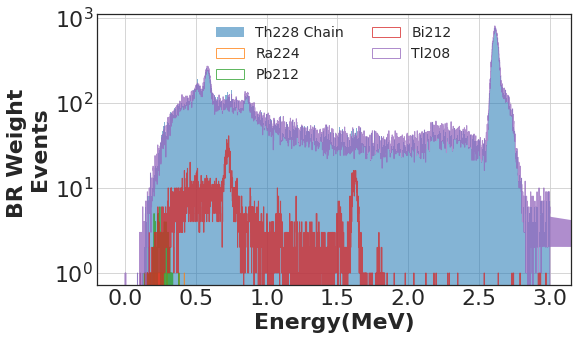

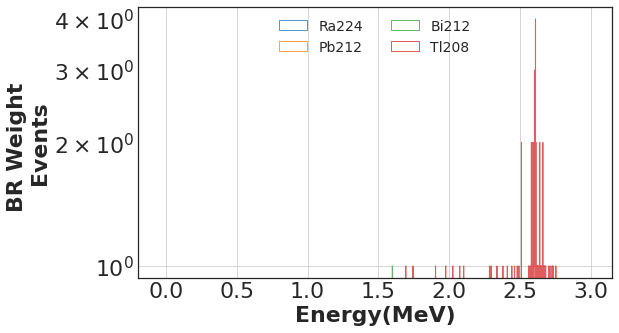

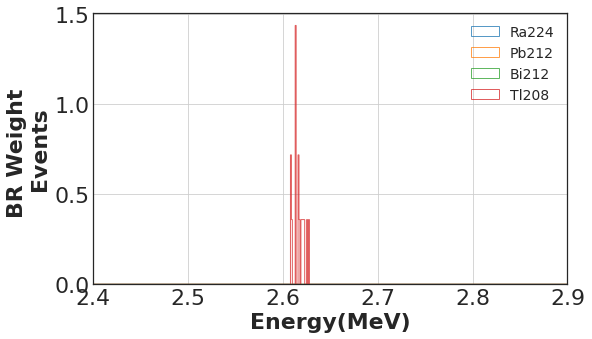

In [26]:

fig, ax = plt.subplots(figsize=(8.5, 5))
fig, bx = plt.subplots(figsize=(8.5, 5))
fig, cx = plt.subplots(figsize=(8.5, 5))

nbins=3000
peakcuts=TL_peakcuts

A=[]
B=[]
C=[]
deposited_events=0
dep_nobr=0
GEvents_sum=0
GEvents_nobr=0


A.append(
    ax.hist(
            x=ChainDF["energy"]/1000
            ,bins=nbins
            #,linewidth=0.5
            ,range=[0,3]
            ,alpha=0.55
            #,histtype='step'
            #,color="darkgrey"
            ,label="%s"%("Th228 Chain"),
            
       # weights=ChainDF["Branch_ratio"]
            )
        )


for i,tgt in enumerate(chain):
    
    
    pltDF=ChainDF.query("Target == '%s'"%(tgt))
    if len(pltDF["energy"])==0:
        continue
        
    print("Target :",tgt, ", Deposited Events :", len(pltDF["energy"]), ", \t Weight with BR:",
          round(pltDF["Branch_ratio"].sum(),1), ",  \t Total Sim: ",Chainsource_list[i].TotalSim)
    deposited_events=deposited_events+round(pltDF["Branch_ratio"].sum(),1)
    dep_nobr=len(pltDF["energy"])+dep_nobr
    
    SSDF=pltDF.query(sscuts)
    PeakDF=pltDF.query(peakcuts)
    
    GEvents=SSDF["Branch_ratio"].sum()
    GEventsnbr=len(SSDF["energy"])
    
    GEvents_sum=GEvents_sum+GEvents
    GEvents_nobr=GEvents_nobr+GEventsnbr
    
    print("Alpha ",len(pltDF["energy"])/Chainsource_list[i].TotalSim )
    print("\t\tGEvents :", GEvents, ", Gamma ", GEvents/Chainsource_list[i].TotalSim,
         "GEvents nobr ", GEventsnbr, " Gammanbr ", GEventsnbr/Chainsource_list[i].TotalSim )
    
    A.append(
        ax.hist(
                x=pltDF["energy"]/1000
                ,bins=nbins
                ,range=[0,3]
                ,alpha=0.75
                ,histtype='step'
                #,   color=Tlcolor,
                ,label="%s"%(tgt),
        #        weights=pltDF["Branch_ratio"]
                )
            )
    B.append(
                bx.hist(
                x=SSDF["energy"]/1000
                ,bins=nbins
                ,range=[0,3]
                ,alpha=0.75
                ,histtype='step'
                #,   color=Tlcolor,
                ,label="%s"%(tgt),
         #       weights=SSDF["Branch_ratio"]
                )
    )
    
    
    C.append(
                cx.hist(
                x=(PeakDF["energy"]/1000)+(0.001*i)
                ,bins=nbins
                ,range=[0,3]
                ,alpha=0.75
                ,histtype='step'
                #,   color=Tlcolor,
                ,label="%s"%(tgt),
                weights=PeakDF["Branch_ratio"]
                )
    )
            
    
    
    

if 1==0:
    A.append(
        ax.hist(
            x=ChainDF["energy"]/1000
            ,bins=nbins
            ,linewidth=0.5
            ,range=[0,3]
            ,alpha=0.55
            ,histtype='step'
            ,color="darkgrey"
            ,label="%s"%("Th228 Chain"),
            
        weights=ChainDF["Branch_ratio"]
            )
        )    
    
#print("\n\nTh228 Chain ", " Deposited Events", deposited_events, " alpha :", deposited_events/Chainsource_list[0].TotalSim)

#print("Th228 Chain ", " Deposited Events no BR", dep_nobr, " alpha no BR :", dep_nobr/Chainsource_list[0].TotalSim)

#print("GEvents", GEvents_sum)
#print(" Gamma : ",GEvents_sum/Chainsource_list[0].TotalSim )
#print(" Gammanbr : ",GEvents_nobr/Chainsource_list[0].TotalSim )

#Gamma=GEvents_sum/Chainsource_list[0].TotalSim
#alpha=deposited_events/Chainsource_list[0].TotalSim
    




ax.legend(ncol=2, loc="upper center")
ax.set_yscale("log")
ax.set_ylabel("BR Weight \nEvents")
ax.set_xlabel("Energy(MeV)")
ax.grid(True)
ax.set_xlim(-0.2,3.15)

bx.legend(ncol=2, loc="upper center")
bx.set_yscale("log")
bx.set_ylabel("BR Weight \nEvents")
bx.set_xlabel("Energy(MeV)")
bx.grid(True)
bx.set_xlim(-0.2,3.15)

cx.legend(ncol=1, loc="upper right")
cx.set_ylabel("BR Weight \nEvents")
cx.set_xlabel("Energy(MeV)")
cx.set_xlim(2.4,2.9)
cx.grid(True)


0.076 3.3e-05
13157.895 0.174
Rate @ 4 kBq : 0.127 Hz
Max Rate @ 21289.9 kBq -> 0.365 Hz 


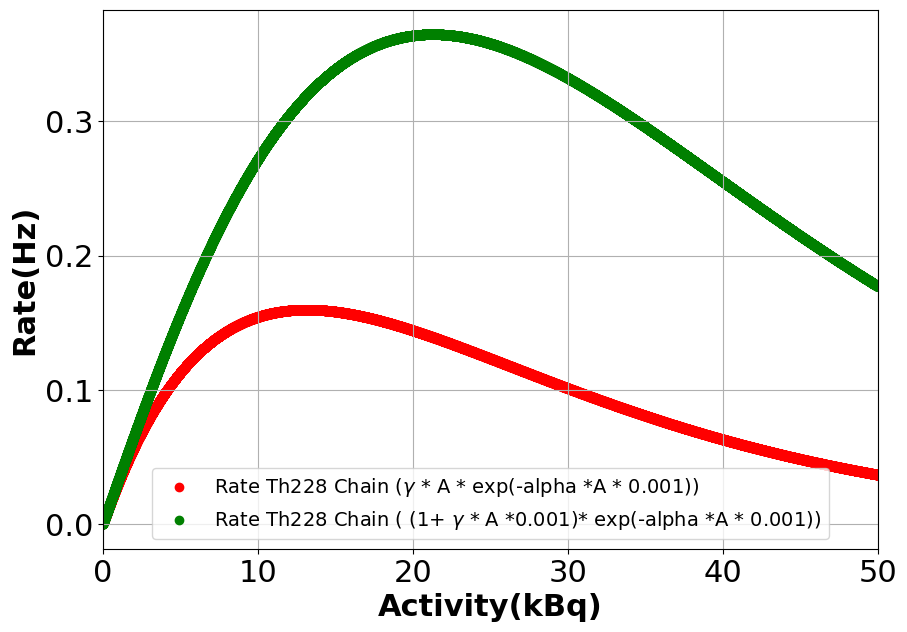

In [36]:
alpha=0.076
gamma=3.3e-5
GoodEventReq=100

print(alpha, gamma)
t= 0.001
A=np.arange(1,50000,1)
  
f2 = np.exp(-alpha*A*t)
f3 =(1+alpha*A*t)*np.exp(-alpha*A*t)


rate_f3=gamma*A*f3
time_f3=GoodEventReq/rate_f3

rate_f2=gamma*A*f2
time_f2=GoodEventReq/rate_f2


timeto_f3=min(GoodEventReq/(gamma*A*f3)/(3600))
act_f3=(1+np.sqrt(5))/(2*alpha*t)

timeto_f2=min(GoodEventReq/(gamma*A*f2)/(3600))
act_f2=1/(alpha*t)

print( round(act_f2,3),round(timeto_f2,3))

fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(A/1000,y=rate_f2,c="red",label="Rate Th228 Chain ($\gamma$ * A * exp(-alpha *A * 0.001))")
ax.scatter(A/1000,y=rate_f3,c="green",  label="Rate Th228 Chain ( (1+ $\gamma$ * A *0.001)* exp(-alpha *A * 0.001))")

ax.set_ylabel("Rate(Hz)")
ax.set_xlabel("Activity(kBq)")


from scipy import interpolate
rate_est=interpolate.interp1d(A, rate_f3, kind='linear')
ax.set_xlim(0,50)
ax.grid("True")
ax.legend()
#ax.set_xscale("log")
print("Rate @ 4 kBq :", np.round(  rate_est(4000) ,3) , "Hz" )

print("Max Rate @ %.1f kBq -> %.3f Hz "%(act_f3, np.round(  rate_est(act_f3) ,3)))

In [5]:
Tl208=GetNexoDF("Tl208")
Bi212=GetNexoDF("Bi212")


error: Error -5 while decompressing data: incomplete or truncated stream

In [ ]:


Tl208_totalsim=TotalSimCount(Tl208)
Bi212_totalsim=TotalSimCount(Bi212)


Tl208_alpha=len(Tl208.query("energy > 0")["energy"])/Tl208_totalsim
Tl208_gamma=len(Tl208.query(TL_peakcuts))/Tl208_totalsim
print("Tl208 :: alpha ",Tl208_alpha," Gamma ", Tl208_gamma)

Bi212_alpha=len(Bi212.query("energy > 0")["energy"])/Bi212_totalsim
Bi212_gamma=len(Bi212.query(TL_peakcuts))/Bi212_totalsim
print("Bi212 :: alpha ",Bi212_alpha," Gamma ", Bi212_gamma)

In [ ]:
tgt="Cs137"
cut=Cs_peakcuts
version="-v3"





    
DF_totalsim=TotalSimCount(DF)

if DF_totalsim == -1:
    print("Issue with total sim calc")
    exit
    
    
DF_alpha=len(DF.query("energy > 0")["energy"])/DF_totalsim
DF_gamma=len(DF.query(cut))/Tl_totalsim

In [ ]:
DF

Text(0.5, 0, 'Energy(MeV)')

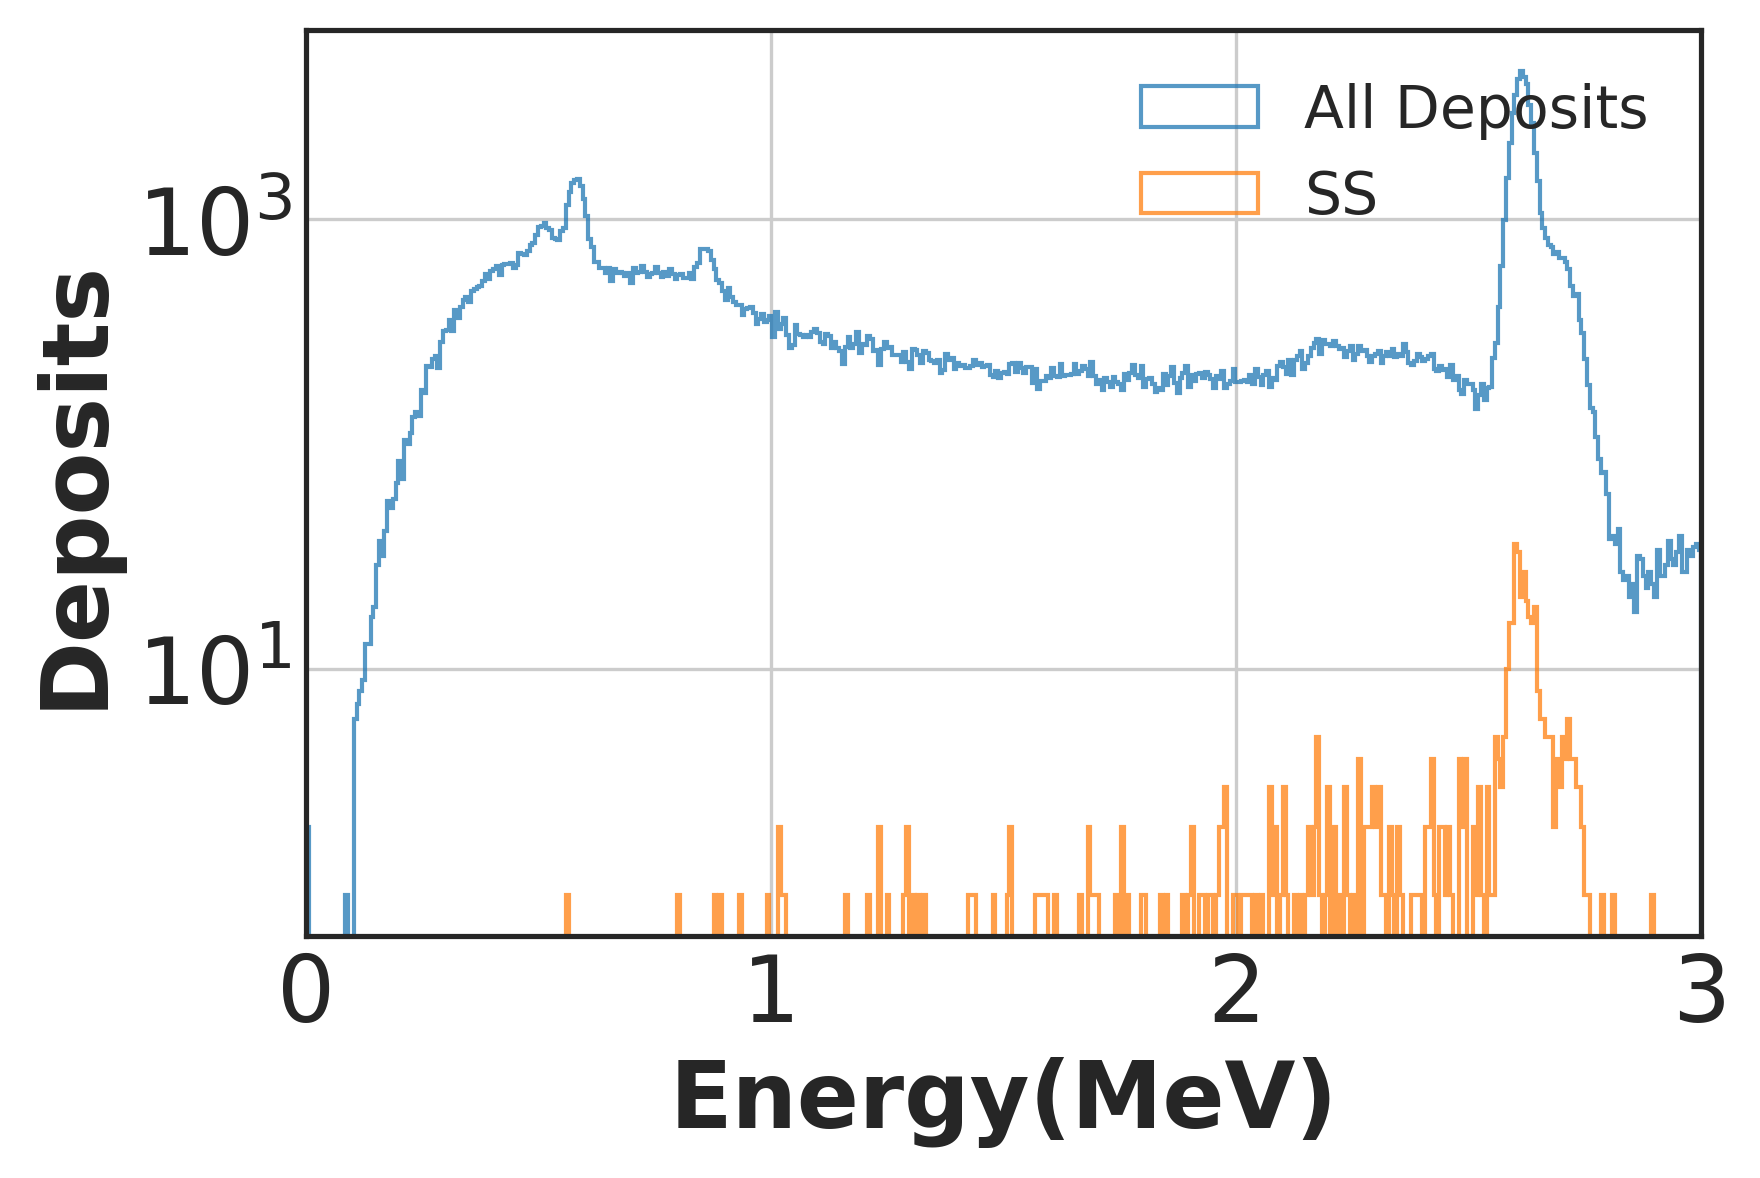

In [35]:

nbins=500

fig, ax = plt.subplots(figsize=(6, 4),dpi=300)
plt.hist(Tl208["energy"]/1000
         ,nbins
         ,range=[0,3]
         , alpha=0.75,
                    histtype='step',
                      #   color=Tlcolor,
                 label="All Deposits")

plt.hist(Tl208.query(sscuts)["energy"]/1000
         ,nbins
         ,range=[0,3]
         , alpha=0.75,
                    histtype='step',
                      #   color=Tlcolor,
                 label="SS")


plt.xlim(0,3)
plt.grid(True)
plt.legend(loc ="upper right")
plt.yscale("log")
plt.ylabel("Deposits")
plt.xlabel("Energy(MeV)")
#plt.title("Cs137 Deposits")